# As we know Logistic Regression cant handel non-linear datas it has to be linear so that the model works properly for non-linear datas other models are used like decision tree, random forest etc. BUT, by using polynomial feature on Logistic Regression it is possible

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('ushape.csv')
df.head()

In [ ]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)


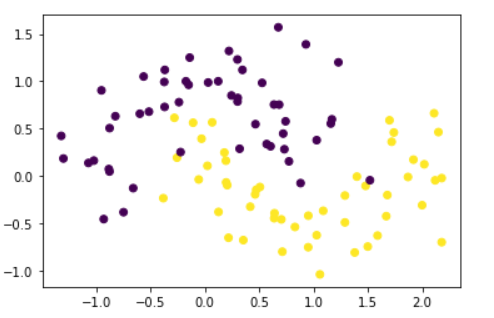

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [ ]:
clf.fit(X,y)


In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), clf, legend=2)

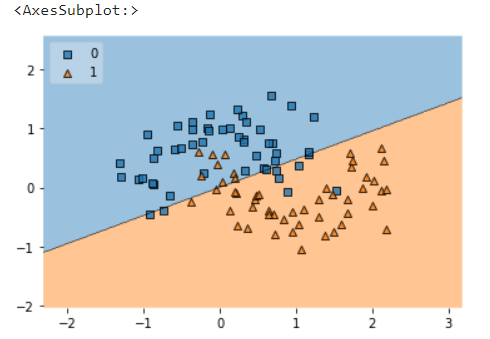

In [ ]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [ ]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

In [ ]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

In [ ]:
plot_decision_boundary(X,y)

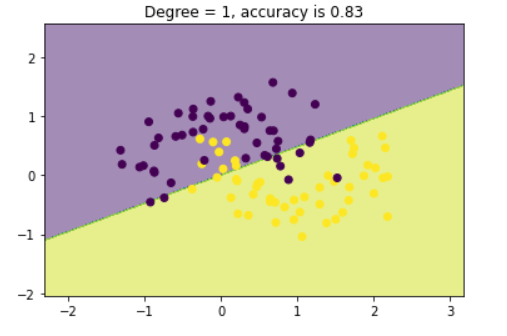

In [ ]:
plot_decision_boundary(X,y,degree=2)

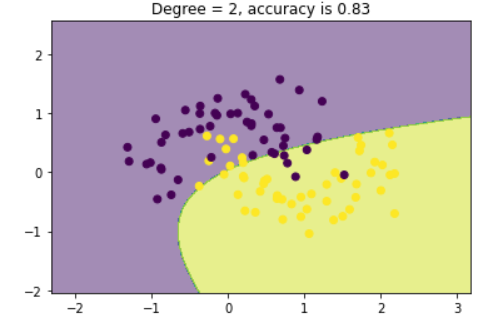

In [ ]:
plot_decision_boundary(X,y,degree=3)

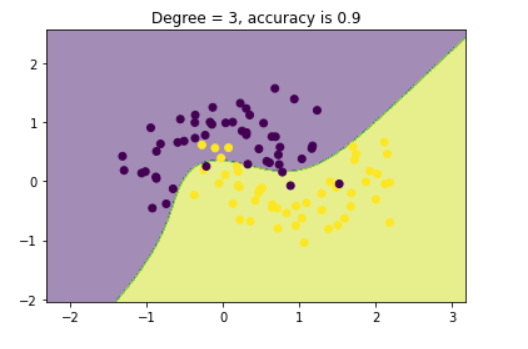

In [ ]:
plot_decision_boundary(X,y,degree=5)

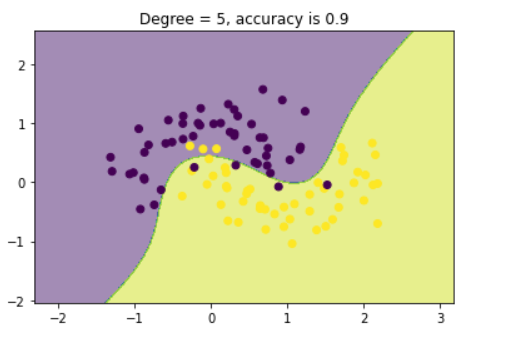

# More the degree more he linerity, but this is not effective as other models so this is not widely used. But, this is also a way to do.